In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [ ]:
 X, y = datasets.load_iris(return_X_y=True)

In [ ]:
iris_data = datasets.load_iris()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, stratify = y, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(random_state=0).fit(X_train_scaled, y_train)

In [ ]:
y_predict = lr.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
cm = confusion_matrix(y_test, y_predict)
cm

array([[45,  0,  0],
       [ 0, 29, 16],
       [ 0,  2, 43]])

In [ ]:
import numpy as np
def accuracy(cm):
  i, j = cm.shape
  pred_corretas= 0
  for k in range(i):
    for l in range(j):
      if k == l:
        pred_corretas += cm[k][l]
  total = np.sum(cm)
  accuracy = pred_corretas / total
  return accuracy

In [ ]:
print(accuracy(cm))

0.8666666666666667


In [ ]:
import numpy as np

def recall(cm):
    i, j = cm.shape
    pred_corretas = np.zeros(i)
    total = np.zeros(i)
    recall = np.zeros(i)
    recall_ponderada = 0
    support = 0
    recalls = []

    for k in range(i):
        for l in range(j):
            if k == l:
                pred_corretas[k] += cm[k][l]
            total[k] += cm[k][l]

    for k in range(i):
        recall[k] = pred_corretas[k] / total[k]
        recalls.append(recall[k])
        recall_ponderada += recall[k] * total[k]
        support += total[k]

    recall_ponderada = recall_ponderada / support
    
    return recalls, recall_ponderada


In [ ]:
recalls, recall_ponderada = recall(cm)
print(recalls)
print(recall_ponderada)

[1.0, 0.6444444444444445, 0.9555555555555556]
0.8666666666666667


In [ ]:
import numpy as np

def precision(cm):
    i, j = cm.shape
    pred_corretas = np.zeros(i)
    total_precision = np.zeros(j)
    precision = np.zeros(i)
    precision_ponderada = 0
    support_precision = np.zeros(i)
    peso = 0
    precisions = []

    for k in range(i):
        for l in range(j):
            if k == l:
                pred_corretas[k] += cm[k][l]
            support_precision[k] += cm[k][l]

    for l in range(j):
        for k in range(i):
            total_precision[l] += cm[k][l]

    for k in range(i):    
        precision[k] = pred_corretas[k] / total_precision[k]
        precisions.append(precision[k])
        precision_ponderada += precision[k] * support_precision[k]
        peso += support_precision[k]

    precision_ponderada = precision_ponderada / peso
    
    return precision, precision_ponderada


In [ ]:
precisions, precisao_ponderada = precision(cm)
print(precisions)
print(precisao_ponderada)

[1.         0.93548387 0.72881356]
0.8880991434299251


In [ ]:
def f1_score(cm):
  i, j = cm.shape
  precisoes, precisao_ponderada = precision(cm)
  recalls, recall_ponderada = recall(cm)
  f1_measure = np.zeros(i)
  support = np.zeros(i)
  f1_measures = []
  f1_measure_ponderada = 0.0
  peso = 0
  n = len(precisoes)
 
  for k in range(i):
        for l in range(j):
            support[k] += cm[k][l]
  for k in range(n):
    f1_measure[k] = 2 * (precisoes[k] * recalls[k]) / (precisoes[k] + recalls[k])
    f1_measures.append(f1_measure[k])
    f1_measure_ponderada += f1_measure[k] * support[k]
    peso += support[k]

  f1_measure_ponderada = f1_measure_ponderada / peso

  return f1_measures, f1_measure_ponderada

In [ ]:
f1_measures, f1_measure_ponderada = f1_score(cm)
print(f1_measures)
print(f1_measure_ponderada)

[1.0, 0.763157894736842, 0.8269230769230769]
0.8633603238866395


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict, target_names = iris_data.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        45
  versicolor       0.94      0.64      0.76        45
   virginica       0.73      0.96      0.83        45

    accuracy                           0.87       135
   macro avg       0.89      0.87      0.86       135
weighted avg       0.89      0.87      0.86       135



In [ ]:
y_test_binary = (y_test == 2).astype(int)

In [ ]:
probs = lr.predict_proba(X_test_scaled)[:, 1]

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

In [ ]:
fpr, tpr, _ = roc_curve(y_test_binary, probs)
auc = roc_auc_score(y_test_binary, probs)

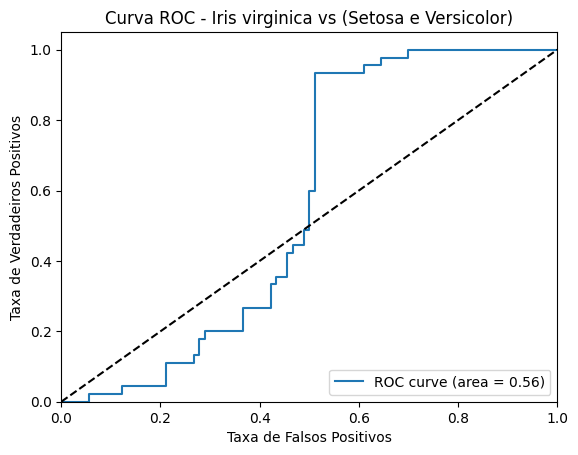

In [ ]:
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Iris virginica vs (Setosa e Versicolor)')
plt.legend(loc="lower right")
plt.show()